In [39]:
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
data = pd.read_csv("query_saturated_kafka.csv")
data = data[:100]

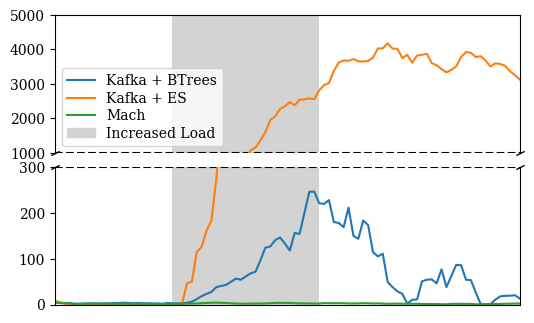

In [41]:
top_ylim = [1000, 5000]
bot_ylim = [0, 300]

load = data["Workload"]
spike_begin = load.loc[load.eq(max(load))].index[0]
spike_end = spike_begin + 30

md = data["Mach Data Latency"]
me = data["Mach Execution Latency"]
kd = data["Kafka Data Latency"]
ke = data["Kafka Execution Latency"]
ed = data["ES Data Latency"]
ee = data["ES Execution Latency"]

plt.rcParams['font.family'] = 'serif'
fig = plt.figure(figsize=(6, 11))

gs = gridspec.GridSpec(3, 1,  height_ratios=(1, 1, .66), figure=fig, hspace=.15)


# Total Latency Graph
def triple_graph(gs_s, kafka, es, mach, ylabel):
    top = fig.add_subplot(gs_s[0])
    bottom = fig.add_subplot(gs_s[1])

    top.spines.bottom.set_visible(False)
    top.xaxis.set_visible(False)
    top.set_ylim(top_ylim)
    top.axvspan(spike_begin, spike_end, facecolor="lightgrey")
    top.axhline(y=top_ylim[0], color="black", linestyle='--')
    top.margins(x=0)

    bottom.spines.top.set_visible(False)
    bottom.xaxis.set_visible(False)
    bottom.set_ylim(bot_ylim)
    bottom.axvspan(spike_begin, spike_end, facecolor="lightgrey")
    bottom.axhline(y=bot_ylim[1], color="black", linestyle='--')
    bottom.margins(x=0)

    d = .5  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=6,
                  linestyle="none", color='k', mec='k', mew=1, clip_on=False)

    top.plot([0, 1], [0, 0], transform=top.transAxes, **kwargs)
    bottom.plot([0, 1], [1, 1], transform=bottom.transAxes, **kwargs)

    
    top.plot(kafka, color=colors[0], label="Kafka + BTrees")
    top.plot(es, color=colors[1], label="Kafka + ES")
    top.plot(mach, color=colors[2], label="Mach")

    bottom.plot(kafka, color=colors[0])
    bottom.plot(es, color=colors[1])
    bottom.plot(mach, color=colors[2])
    



mach = list((md + me).rolling(rw).mean())
kafka = list((kd + ke).rolling(rw).mean())
es = list((ed + ee).rolling(rw).mean())
gs_s = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[0], height_ratios=(1, 1), hspace=.1)

triple_graph(gs_s=gs_s, kafka=kafka, es=es, mach=mach, ylabel="Total Query Latency\n(Seconds)")
ax = gs_s.figure.axes[0]

handles, labels = ax.get_legend_handles_labels()
labels.append("Increased Load")
handles.append(mpatches.Patch(color="lightgrey"))
ax.legend(handles, labels, bbox_to_anchor=(0, 0), loc="lower left", labelspacing=.25)

plt.show()